# Camp Fire stats

On 2020-02-05, we met and did animal stuff. One of the things we did is record a number of measurements of each Camp Fire member. I love working with data, so I couldn't resist the chance to do some statistics on those numbers.

The measurements we took are:

* breath: how long can you hold your breath?
* legs: how many inches long are your legs?
* arms: how many inches long is your arm span?
* smell: from how many inches away can you smell a jar of cinnamon?
* jump: how many inches can you standing-long-jump?
* run: how many seconds does it take you to run 30 feet?
* weight: how many pounds do you weigh?
* sleep: how many hours a night do you sleep?

In this Jupyter notebook, I'll explore the data set a bit, and I'll explain how I did it.

## Import some tools

First, I need to "import" some packages, or collections of tools, to use to work with the data.

In [2]:
# pandas has nothing to do with the animal.
# it has everything to do with working with tables of data, like ours.
# "as pd" means that, when I refer to pandas, I'll call it "pd"
import pandas as pd    

# seaborn is for making pretty plots
import seaborn as sns

# matplotlib also has stuff for making plots
from matplotlib import pyplot as plt

# numpy is for mathy stuff
import numpy as np


## Load the data

Next, I'll load the "TSV" spreadsheet that I made with all of our data.

"TSV" means tab-separated values. It's a very simple way to store data:
One line per person, with each piece of information separated from the next
by a tab.

In [3]:
# Load the data into a pandas "dataframe". That's just a nice type of 
# data structure for working with datas like this.
# Unimaginatively, I'm going to call my dataframe "df".

df = pd.read_csv('campfire_stats.tsv', 
                 sep='\t')   # this means that \t (tab) separates the fields on each line

## Get some very basic information about the data

OK, I loaded it. What's it look like? 

In [4]:
# because the last line of this cell has a value (the data frame),
# the result of the cell will display the value. And the notebook
# knows how to display a data frame in a pretty way.
df

,breath,legs,arms,smell,jump,run,weight,sleep
0,NaN,NaN,45.0,11.0,63.00,2.3,53.5,10.0
1,60.0,NaN,NaN,NaN,NaN,NaN,67.2,NaN
2,NaN,NaN,41.0,NaN,NaN,2.7,38.2,NaN
3,30.0,28.0,48.0,6.0,56.00,2.9,48.0,10.0
4,30.0,34.5,62.0,7.0,62.25,2.6,89.0,10.0
5,36.0,32.0,58.0,24.0,59.00,2.5,80.0,10.0
6,43.0,29.5,48.0,24.0,52.00,2.1,72.6,7.0
7,70.0,38.5,NaN,NaN,NaN,2.7,122.4,NaN
8,60.0,31.0,51.0,60.0,55.00,2.8,67.0,10.0
9,21.0,34.0,61.0,7.0,66.00,2.6,79.6,NaN


Hey, what are all those "NaN" values? Those are missing values. Some kids didn't do everything. Let's investigate that.

Each thing we measured (e.g., breath) is called a "column" in the dataframe. How many values do we have for each column?

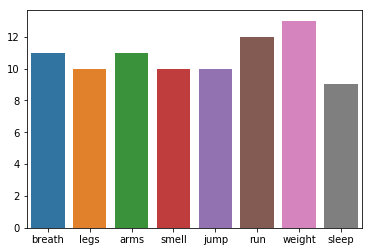

In [5]:
# Run a for loop over all the columns. For each column, count up the non-missing values.
# Store the results in value_counts
value_counts = [len(df[df[column].notnull()])
                for column in df.columns]

sns.barplot(x=df.columns, y=value_counts)

Huh! All 13 kids recorded their weight, and all but one person recorded their running speed. 

But only 9 of 13 people recorded their sleep. Why? Are they ashamed of how much they sleep? Did they have trouble doing the math to figure it out? We may never know.

Let's see how many of the fields each individual person filled out. I'll use a histogram, which just stacks up the number of people who filled out each number of fields.


Text(0,0.5,'Number of kids')

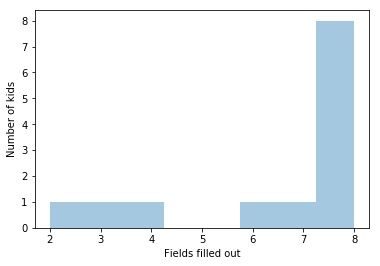

In [6]:
# create an empty list for the counts of fields. 
field_counts = []
# Fill the list using a for loop over all the rows (people)
for _, row in df.iterrows():
    # append the number of non-missing values for this row
    field_counts.append(sum(row.notnull())) 

# make an empty plot
f, ax = plt.subplots()
# plot a histogram of the numbers of non-missing values
sns.distplot(field_counts, 
             kde=False, 
             bins=max(field_counts),
             ax=ax)  # put it on the plot I created above
ax.set_xlabel("Fields filled out")
ax.set_ylabel("Number of kids")

So, 8 kids filled out all 8 fields, and the rest filled out fewer... as few as two fields!

## Let's start playing with the data

Now, for each column, I'll make a histogram, and I'll see what I think about the distribution of values in the column.

In [21]:
# let's define a method to plot a column, to save us typing later.
# And, what the heck, let's have it print out the range, mean and median, too.

def hist_column(column, animal=None, animal_val=None):
    """
    This method will plot a histogram for one column.
    Second and third arguments are used for drawing a line for the animal comparison (later)
    """
    
    # make an empty plot
    f, ax = plt.subplots()
    # plot a histogram of the non-missing values
    values_to_plot = df[df[column].notnull()][column]
    sns.distplot(values_to_plot,
                ax=ax, kde=False, bins=10)
    # plot a line representing the animal's value
    if animal and animal_val:
        sns.lineplot((animal_val, animal_val), (0,1),
                    dashes=True)
        ax.set_title(f"line: {animal}, {animal_val:.1f}")
    print(f"{column}: range={min(values_to_plot)}-{max(values_to_plot)}, mean={np.mean(values_to_plot):.2f}, median={np.median(values_to_plot)}")
    

breath: range=18.0-70.0, mean=40.82, median=40.0


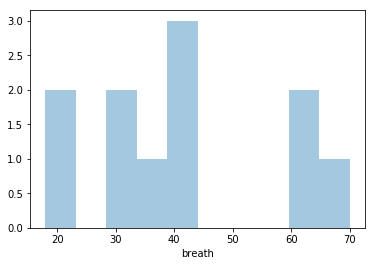

In [8]:
hist_column("breath")


Wow! We have a huge range of amounts of time that people can hold their breath, from 20 to 70 seconds! Huh, already I have a hypothesis I want to test.

**Hypothesis: older kids can hold their breath longer.**

But I don't know how old each kid is! Hmm, but I've got their arm span. That's strongly correlated with height, and height and age are pretty strongly correlated. So, revised hypothesis.

**Hypothesis: kids with longer arm spans can hold their breath longer.**

So, what's our distribution of arm spans?

arms: range=28.0-62.0, mean=49.55, median=51.0


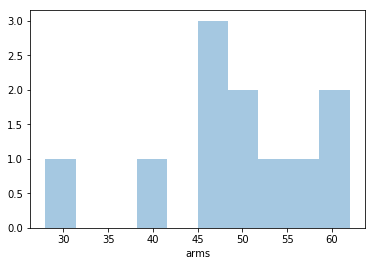

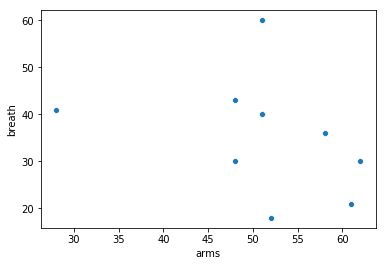

In [9]:
hist_column("arms")

# OK, let's scatter plot arm span vs. breath

f, ax = plt.subplots()
sns.scatterplot("arms", "breath",
               data=df, ax=ax)

Oho! Look at that! It doesn't look to me like there's a close relationship between arm span and breath. Bear in mind that not everyone with a breath measurement has an arm measurement, too, and vice versa.

Hmm, I should probably do a statistical test to see if those values are correlated. Heck, let's just look for pairwise correlations between all our columns.

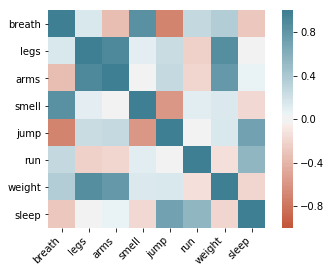

In [10]:
ax = sns.heatmap(
    df.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Each box represents the correlation between two different columns. Darker blue means more-positive correlation, darker red means more-negative correlation.

So! Leg and arm length and weight are all highly positively correlated. That's good, they should be. 

Jumping distance is *negatively* correlated with breath-holding. Huh? The farther you can jump, the less time you can hold your breath? Let's look at that with dots.



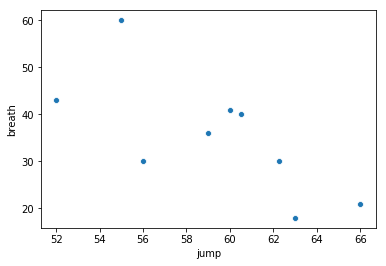

In [11]:
f, ax = plt.subplots()
sns.scatterplot("jump", "breath",
               data=df, ax=ax)

Wow, that's... fairly convincing. Like, those two quantities really look like they're negatively correlated, to me. And yet I have a strong prior belief that, if anything, jumping distance and breath-holding should be positively correlated. So, if this were something I discovered in some scientific data, I'd be really itching to find some other datasets and see if it held up, about now. I'm guessing the effect would go away.

And (back to the correlation heatmap, now) breath-holding is strongly correlated with the distance at which you can smell cinnamon? Well, at least both of those things are, I guess, breath-related.

But I think we can probably dismiss those observations as artifacts. Not real. We're measuring relatively few people, so we're getting effects that look real but probably aren't. I could do some tests to look for that, but that is BEYOND MY SCOPE HERE.

### Oh but I got distracted!

I was looking for a relationship between arm span and breath-holding. And I got one... weakly negative. Weird! Hypothesis not supported.

### OK fine let's look at everything else

I histogrammed arms and breath... what about the rest?

legs: range=20.0-38.5, mean=30.45, median=31.5
smell: range=4.0-60.0, mean=16.20, median=9.0
jump: range=52.0-66.0, mean=59.67, median=60.25
run: range=2.1-2.9, mean=2.58, median=2.6500000000000004
weight: range=38.2-122.4, mean=67.85, median=67.0
sleep: range=7.0-10.5, mean=9.72, median=10.0


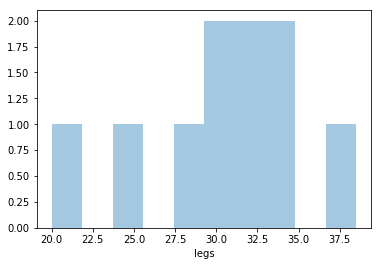

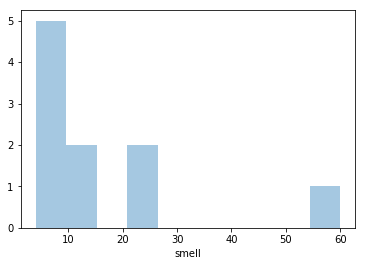

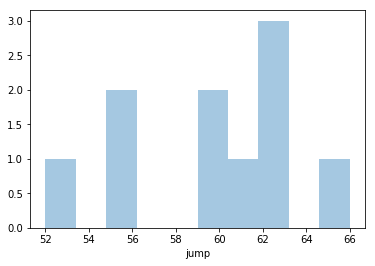

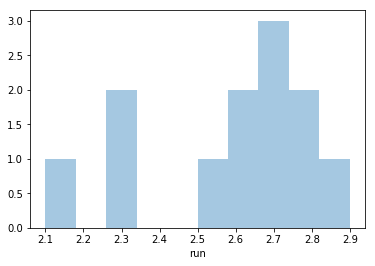

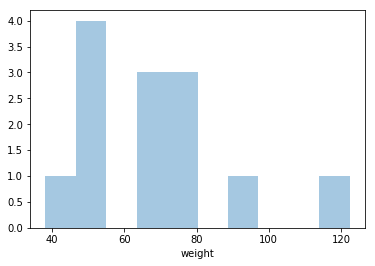

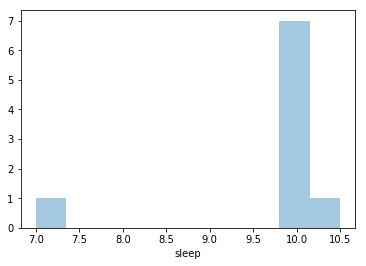

In [22]:
for column in df.columns:
    if column not in ['arms', 'breath']:
        hist_column(column)

OK, so a few observations:
    
* everyone sleeps 10+ hours... except one person who sleeps 7! Wow! 
    * I mean, what do they do with all that time? Probably awesome stuff.
* most people claim to be able to smell the cinnamon at a distance somewhere under 2 feet
    * but one person can smell it at *5 feet?!* 
    * I'm not gonna say they're making it up, but... the sheet actually says 5 feet; maybe they meant 5 inches?

## Animal comparison

Finally, each question the kids were asked compared them against an animal. I'll manually enter the values for each animal. Then I'll plot the same histograms as before, but with a vertical orange line where the value for the relevant animal goes.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


breath: range=18.0-70.0, mean=40.82, median=40.0
legs: range=20.0-38.5, mean=30.45, median=31.5
arms: range=28.0-62.0, mean=49.55, median=51.0
smell: range=4.0-60.0, mean=16.20, median=9.0
jump: range=52.0-66.0, mean=59.67, median=60.25
run: range=2.1-2.9, mean=2.58, median=2.6500000000000004
weight: range=38.2-122.4, mean=67.85, median=67.0
sleep: range=7.0-10.5, mean=9.72, median=10.0


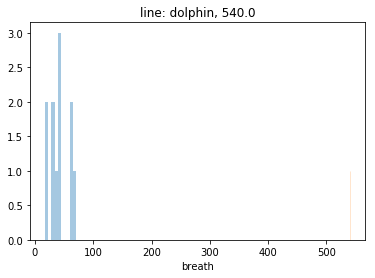

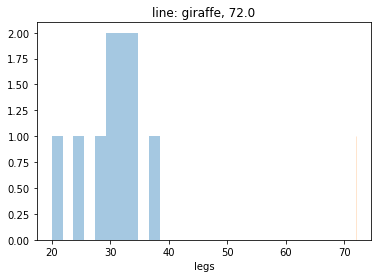

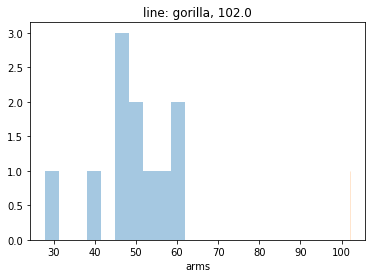

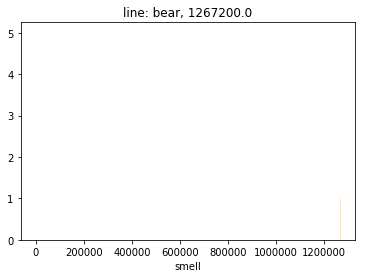

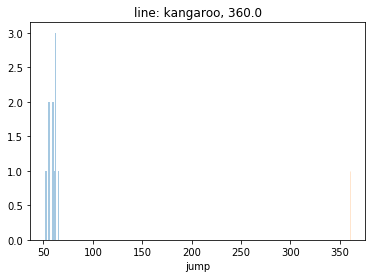

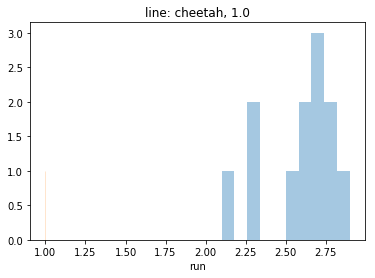

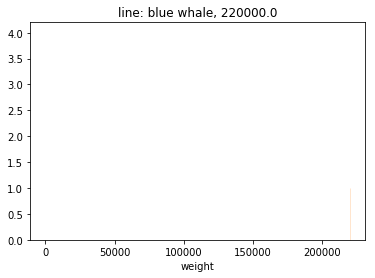

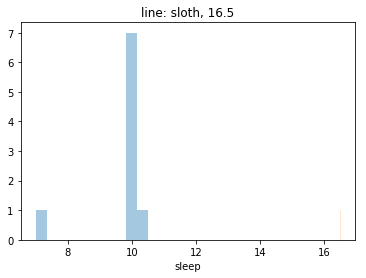

In [23]:
column_animalandvalue_map = {
    "breath": ("dolphin", 9*60),
    "legs": ("giraffe", 6*12),
    "arms": ("gorilla", 8.5*12),
    "smell": ("bear", 20 * 12 * 5280), # 20 miles in inches
    "jump": ("kangaroo", 30*12),
    "run": ("cheetah", 1.0),
    "weight": ("blue whale", 220000),
    "sleep": ("sloth", 16.5),
}

for column in df.columns:
    # grab the animal name and statistic value for each statistic
    animal, value = column_animalandvalue_map[column]
    hist_column(column, animal, value)
    
    

What conclusions can we draw from those plots? I draw a few:

* Wow, animals that have evolved to do things well sure do them well!
* Humans, not so much.
    * though I notice that "how many books can you read in a month" wasn't one of the questions.
* Something weird happens to my histograms when the animal value is waaaaaay higher than all the human values. 
    * I think they get so skinny that they disappear.


## In Summary

Well! We've got a lot of missing data, some probably-not-real correlations, and a few really interesting distributions -- that sleep distribution is nuts. 

Well, that was fun!